In [1]:
import pandas as pd
import numpy as np
csv_path = "YouTube_Combined_Cleaned (1).csv"  # change if your filename differs
df = pd.read_csv(csv_path)

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28878 entries, 0 to 28877
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   artist_name    28878 non-null  object 
 1   channel_ID     28878 non-null  object 
 2   channel_title  28878 non-null  object 
 3   published      28878 non-null  object 
 4   views          28878 non-null  float64
 5   subs           28878 non-null  float64
 6   videos         28878 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


In [7]:

df['published'] = pd.to_datetime(df['published'], errors='coerce', utc=True)
df = df.drop_duplicates(subset=['channel_ID']).reset_index(drop=True)
num_missing_dates = df['published'].isna().sum()
num_rows = len(df)
num_missing_dates, num_rows

now = pd.Timestamp.utcnow()
df['channel_age_years'] = (now - df['published']).dt.days / 365.25
df['views_per_video'] = np.where(df['videos']>0, df['views']/df['videos'], np.nan)
df['subs_per_video']  = np.where(df['videos']>0, df['subs']/df['videos'], np.nan)
df['views_per_sub']   = np.where(df['subs']>0, df['views']/df['subs'], np.nan)

df[['channel_title','channel_age_years','views','subs','videos','views_per_video','views_per_sub']].head(10)


,channel_title,channel_age_years,views,subs,videos,views_per_video,views_per_sub
0,BiBi,7.931554,1.660895e+07,108000.0,109.0,1.523757e+05,153.786556
1,TOMORROW X TOGETHER OFFICIAL,6.707734,3.084221e+09,12800000.0,2798.0,1.102295e+06,240.954784
2,TREASURE (트레저),6.573580,3.193448e+09,7810000.0,1386.0,2.304075e+06,408.892176
3,JJ Lin林俊傑,19.564682,1.501724e+09,1590000.0,469.0,3.201970e+06,944.480605
4,Get Everybody Moving,15.967146,4.938980e+05,2610.0,235.0,2.101694e+03,189.232950
5,mwamjapan,6.324435,4.877833e+08,717000.0,68.0,7.173283e+06,680.311385
6,Ayase / YOASOBI,6.803559,5.752251e+09,7230000.0,257.0,2.238230e+07,795.608693
7,Ian Chan 陳卓賢國際歌迷會,7.033539,1.220018e+07,26600.0,494.0,2.469672e+04,458.653421
8,NCT 127,8.246407,1.411148e+09,5630000.0,958.0,1.473015e+06,250.647941
9,NCT,9.478439,1.546569e+09,6360000.0,1608.0,9.617967e+05,243.171243


In [9]:
# Summary stats
desc = df[['views','subs','videos','channel_age_years','views_per_video','views_per_sub']].describe()
desc

# Top channels by views & subs
top_views = df.nlargest(10, 'views')[['channel_title','views','subs','videos']]
top_subs  = df.nlargest(10, 'subs')[['channel_title','subs','views','videos']]
top_views, top_subs


(                                          channel_title         views  \
 10897                        Cocomelon - Nursery Rhymes  2.040176e+11   
 24725                                 ✿ Kids Diana Show  1.172561e+11   
 2918                                      Vlad and Niki  1.094291e+11   
 6970                                                WWE  9.611190e+10   
 21318                                           MrBeast  9.004474e+10   
 10532                                      Ryan's World  6.132496e+10   
 1915                                          Bad Bunny  4.149200e+10   
 3829                                       Taylor Swift  3.966070e+10   
 7968                                          BLACKPINK  3.915781e+10   
 4560   Genevieve's Playhouse - Learning Videos for Kids  3.687818e+10   
 
               subs   videos  
 10897  195000000.0   1619.0  
 24725  135000000.0   1388.0  
 2918   142000000.0    919.0  
 6970   109000000.0  86034.0  
 21318  413000000.0    884.0 

In [11]:
num_cols = ['views','subs','videos','channel_age_years','views_per_video','views_per_sub']
log_df = df[num_cols].replace(0, np.nan).apply(np.log10)
corr = log_df.corr()
corr
# This is the correlation matrix

,views,subs,videos,channel_age_years,views_per_video,views_per_sub
views,1.000000,0.961069,0.672445,0.198421,0.927381,0.484823
subs,0.961069,1.000000,0.632841,0.171445,0.886516,0.224284
videos,0.672445,0.632841,1.000000,0.172420,0.346709,0.301616
channel_age_years,0.198421,0.171445,0.172420,1.000000,0.167309,0.183792
views_per_video,0.927381,0.886516,0.346709,0.167309,1.000000,0.454584
views_per_sub,0.484823,0.224284,0.301616,0.183792,0.454584,1.000000


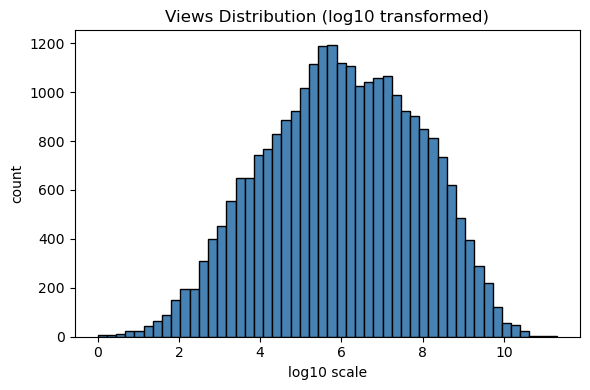

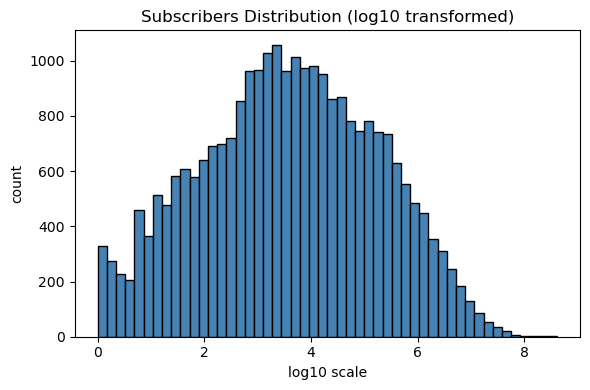

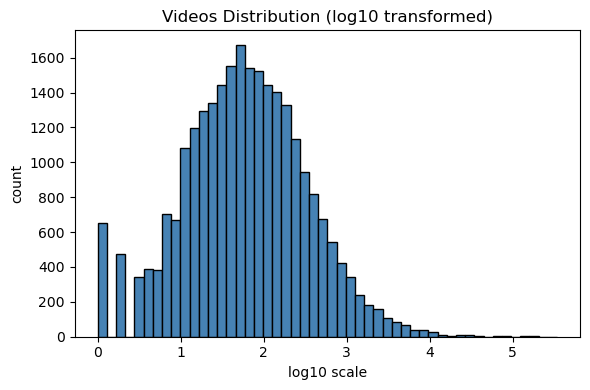

In [19]:

def log_hist(series, title, bins=50):
    # Drop zeros and negatives
    s = series[series > 0].dropna()
    
    # Apply log10 transform
    s_log = np.log10(s)

    plt.figure(figsize=(6,4))
    plt.hist(s_log, bins=bins, color="steelblue", edgecolor="black")
    plt.title(title)
    plt.xlabel('log10 scale')
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()


log_hist(df['views'],  'Views Distribution (log10 transformed)')
log_hist(df['subs'],   'Subscribers Distribution (log10 transformed)')
log_hist(df['videos'], 'Videos Distribution (log10 transformed)')

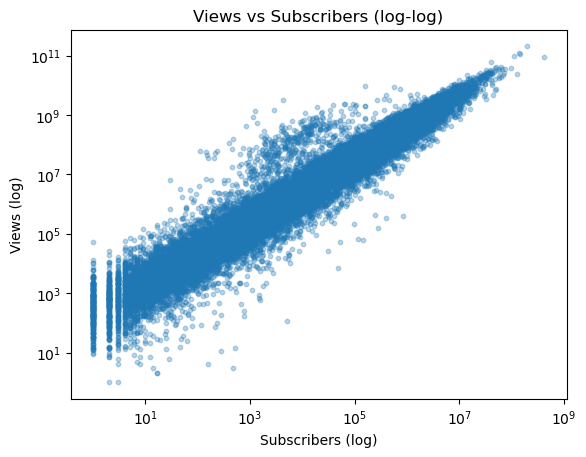

In [13]:
import matplotlib.pyplot as plt

# Views vs Subs (log scale)
x = df['subs'].replace(0, np.nan)
y = df['views'].replace(0, np.nan)

plt.figure()
plt.scatter(x, y, alpha=0.3, s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Subscribers (log)')
plt.ylabel('Views (log)')
plt.title('Views vs Subscribers (log-log)')
plt.show()


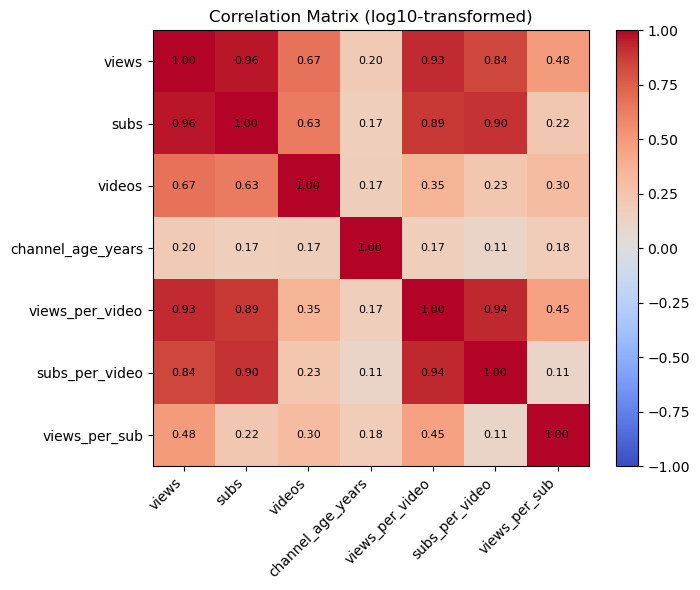

In [21]:
log_df = df[['views','subs','videos','channel_age_years',
             'views_per_video','subs_per_video','views_per_sub']].copy()

for c in ['views','subs','videos','views_per_video','subs_per_video','views_per_sub']:
    log_df[c] = log_df[c].where(log_df[c] > 0, np.nan)

log_df = np.log10(log_df)
corr = pd.DataFrame(log_df).corr()

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation Matrix (log10-transformed)')

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        val = corr.values[i, j]
        plt.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8, color='black')
plt.tight_layout()
plt.show()

In [23]:
sample = df.sample(1000, random_state=42) if len(df) > 1000 else df.copy()
sample_path = "sample_youtube_channels.csv"
feature_path = "youtube_channels_with_features.csv"

sample.to_csv(sample_path, index=False)
df.to_csv(feature_path, index=False)

print("Wrote:", sample_path, "and", feature_path)

Wrote: sample_youtube_channels.csv and youtube_channels_with_features.csv
